# Name: Pola Gnana Shekar
# Roll No: 21CS10052

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('./breast cancer.csv')

print("Data Imported:")
print(data.head())

#Drop the columns which are not used in the analysis - id, Unnamed - 32
print("Data after dropping columns that are not required:")
data =data.drop(['id','Unnamed: 32'], axis=1)
print(data.head())

Data Imported:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_wo

In [2]:
from sklearn.model_selection import train_test_split

# Preprocessing
X = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (455, 30)
Shape of X_test: (114, 30)
Shape of y_train: (455,)
Shape of y_test: (114,)


In [3]:
# perform scaling on the data.
from sklearn.preprocessing import StandardScaler

# scales the data and converts them into the arrays form as required by the models.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display the first few rows of the scaled training set
print(X_train)

[[-1.44075296 -0.43531947 -1.36208497 ...  0.9320124   2.09724217
   1.88645014]
 [ 1.97409619  1.73302577  2.09167167 ...  2.6989469   1.89116053
   2.49783848]
 [-1.39998202 -1.24962228 -1.34520926 ... -0.97023893  0.59760192
   0.0578942 ]
 ...
 [ 0.04880192 -0.55500086 -0.06512547 ... -1.23903365 -0.70863864
  -1.27145475]
 [-0.03896885  0.10207345 -0.03137406 ...  1.05001236  0.43432185
   1.21336207]
 [-0.54860557  0.31327591 -0.60350155 ... -0.61102866 -0.3345212
  -0.84628745]]


In [4]:
print("Target values before:\n")
print(y_train.head())

# convert the target values into 0 and 1 (binary classification)
# M:1 and B:0 
y_train = y_train.replace({'M': 1, 'B': 0})
y_test = y_test.replace({'M': 1, 'B': 0})

print("Target values after conversion into 0 and 1:\n")
print(y_train.head())

Target values before:

68     B
181    M
63     B
248    B
60     B
Name: diagnosis, dtype: object
Target values after conversion into 0 and 1:

68     0
181    1
63     0
248    0
60     0
Name: diagnosis, dtype: int64


## Implementation of Logistic regression.

In [5]:
import numpy as np

# defining the sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression():
    # intialising the learning rates and number of iterations.
    def __init__(self, learnRate=0.01, iterations=1000):
        self.lr = learnRate
        self.iter = iterations
        self.weights = None
        self.bias = None
        
    # built the model by performing iterations and updating the weights.
    def fit(self, X, y):
        samples, features = X.shape
        self.weights = np.zeros(features)
        self.bias = 0
        
        for _ in range(self.iter):
            linear_function = np.dot(X,self.weights)+self.bias
            predictions = sigmoid(linear_function)
            
            dw= (1/samples)*np.dot(X.T, (predictions - y))
            db = (1/samples)*np.sum(predictions-y)
            
            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db
            
    # to make predictions on the test data.
    def predict(self, X):
        linear_function = np.dot(X, self.weights)+self.bias
        y_pred = sigmoid(linear_function)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

In [6]:
# Creating an instance of LogisticRegression

logReg_model = LogisticRegression()
logReg_model.fit(X_train, y_train)
logReg_pred = logReg_model.predict(X_test)

## Implementation of SVM.

In [7]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train,y_train)
svm_pred = svm_model.predict(X_test)

## Implementation of Neural Network.

In [8]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)

## Printing the results

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

models = [logReg_model, svm_model, nn_model]
model_names = ['Logistic Regression', 'SVM', 'Neural Network']

for model, name in zip(models, model_names):
    # Make predictions
    predictions = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    
    # Print metrics for the current model
    print(f"Metrics for {name}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("\n")

Metrics for Logistic Regression:
Accuracy: 0.9824561403508771
Precision: 0.9767441860465116
Recall: 0.9767441860465116


Metrics for SVM:
Accuracy: 0.956140350877193
Precision: 0.9318181818181818
Recall: 0.9534883720930233


Metrics for Neural Network:
Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233




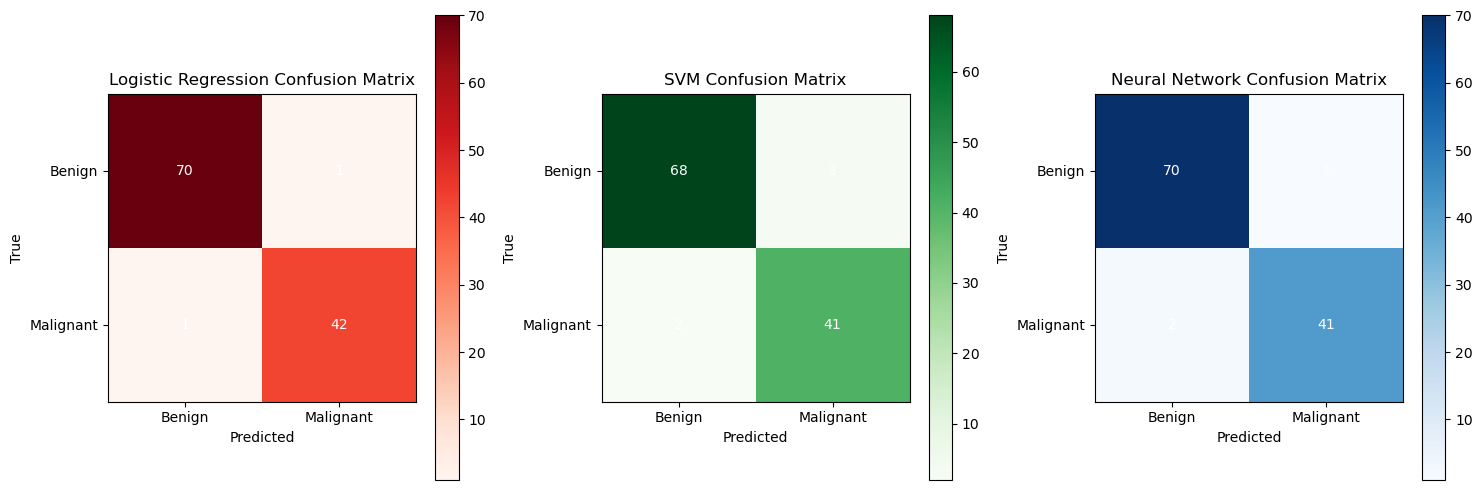

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix_logReg = confusion_matrix(y_test, logReg_pred)
conf_matrix_svm = confusion_matrix(y_test, svm_pred)
conf_matrix_nn = confusion_matrix(y_test, nn_pred)

# Plotting confusion matrices
plt.figure(figsize=(15, 5))

# Logistic Regression Confusion Matrix
plt.subplot(1, 3, 1)
plt.imshow(conf_matrix_logReg, cmap=plt.cm.Reds)
plt.title('Logistic Regression Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.yticks([0, 1], ['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')

# Fill the confusion matrix cells with values for Logistic Regression
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix_logReg[i, j], ha='center', va='center', color='white')
        

# SVM Confusion Matrix
plt.subplot(1, 3, 2)
plt.imshow(conf_matrix_svm, cmap=plt.cm.Greens)
plt.title('SVM Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.yticks([0, 1], ['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')

# Fill the confusion matrix cells with values for SVM
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix_svm[i, j], ha='center', va='center', color='white')
        
# Neural Network Confusion Matrix
plt.subplot(1, 3, 3)
plt.imshow(conf_matrix_nn, cmap=plt.cm.Blues)
plt.title('Neural Network Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.yticks([0, 1], ['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')

# Fill the confusion matrix cells with values for Neural Network
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix_nn[i, j], ha='center', va='center', color='white')

plt.tight_layout()
plt.show()

#### Conclusion:

*Logistic Regression* performs the best among the three models based on the provided metrics (accuracy, precision, and recall). It exhibits the highest accuracy, precision, and recall compared to SVM and Neural Network.

For a dataset that involves classifying breast tumor data into benign or malignant categories, where high accuracy and precision are crucial in correctly identifying malignant tumors while minimizing false positives, Logistic Regression seems to be the most suitable model among the three evaluated.

The Logistic Regression model demonstrates robust performance in classifying the biopsy reports into the two classes (malignant and benign) based on the features provided in the dataset

Logistic Regression appears to be the preferred model due to its superior overall performance in accurately classifying benign and malignant tumors, as reflected in the higher accuracy, precision, and recall values compared to SVM and Neural Network.